In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, add_image,FontManager
from PIL import Image
import matplotlib.image as mpimg
from pywaffle import Waffle
from highlight_text import fig_text
from soccerplots.radar_chart import Radar

In [6]:
players = [
    "Jordi Alba",
    "Sergiño Dest",
    "Sergi Roberto",
    "Emerson",
    "Martín Montoya",
    "Óscar Mingueza",
    "Junior Firpo",
    "Juan Miranda",
    "Lionel Messi",
]
path = "/work/assets/fbref/leagueStats/ligue/2021/defense.csv"
comp = "ligue"
season = "2021"
df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
df = pd.concat([df_def, df_gs, df_mis, df_pass, 
                    df_ptype, df_pos, df_shot, df_stan], axis=1)

df = df.loc[:,~df.columns.duplicated()]
df = df.dropna()

In [7]:
df.sort_values(by="TklW_Tackles", ascending=False).reset_index().head(20)

,index,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Tkl_Tackles,...,G+A_Per 90 Minutes,G-PK_Per 90 Minutes,G+A-PK_Per 90 Minutes,xA_Expected,npxG+xA_Expected,xG_Per 90 Minutes,xA_Per 90 Minutes,xG+xA_Per 90 Minutes,npxG_Per 90 Minutes,npxG+xA_Per 90 Minutes
0,3,3,Laurent Abergel,fr FRA,MF,Lorient,27,1993,32.9,160,...,0.12,0.09,0.12,1.4,2.7,0.04,0.04,0.08,0.04,0.08
1,522,522,Aurélien Tchouaméni,fr FRA,MF,Monaco,20,2000,34.0,142,...,0.18,0.06,0.18,2.1,6.1,0.12,0.06,0.18,0.12,0.18
2,24,24,Benjamin André,fr FRA,MF,Lille,29,1990,32.1,111,...,0.03,0.00,0.03,1.3,2.4,0.03,0.04,0.08,0.03,0.08
3,215,215,Youssouf Fofana,fr FRA,MF,Monaco,21,1999,31.9,96,...,0.09,0.00,0.09,2.3,4.4,0.06,0.07,0.14,0.06,0.14
4,460,460,Valentin Rongier,fr FRA,MF,Marseille,25,1994,21.0,102,...,0.14,0.05,0.14,1.1,2.1,0.05,0.05,0.10,0.05,0.10
5,99,99,Mahdi Camara,fr FRA,"MF,DF",Saint-Étienne,22,1998,36.6,109,...,0.14,0.08,0.14,1.6,5.1,0.10,0.04,0.14,0.10,0.14
6,100,100,Eduardo Camavinga,fr FRA,MF,Rennes,17,2002,26.7,111,...,0.11,0.04,0.11,1.3,3.2,0.07,0.05,0.12,0.07,0.12
7,272,272,Boubacar Kamara,fr FRA,MF,Marseille,20,1999,32.2,97,...,0.06,0.00,0.06,1.1,1.8,0.02,0.03,0.06,0.02,0.06
8,117,117,Xavier Chavalerin,fr FRA,MF,Reims,29,1991,28.3,112,...,0.11,0.00,0.11,2.4,3.6,0.04,0.09,0.13,0.04,0.13
9,7,7,Yacine Adli,fr FRA,MF,Bordeaux,20,2000,26.9,91,...,0.26,0.07,0.26,4.7,6.1,0.05,0.18,0.23,0.05,0.23


In [8]:
df = df[["Player", '90s', 'TklW_Tackles','Int','SCA90_SCA', 'GCA90_GCA', 'xA_Per 90 Minutes','Succ%_Dribbles','Cmp%_Total',
    'Won%_Aerial Duels','KP', 'PPA',  '1/3']]

df.loc[:, ["TklW_Tackles",'Int', 'KP', 'PPA',  '1/3']] = df.loc[:, ["TklW_Tackles",'Int', 'KP', 'PPA',  '1/3']].apply(lambda x:x/df["90s"])
df = df.drop(columns=["90s"])

### range

In [9]:
describer = df.describe()
range_max = describer.loc['75%',:] *1.35
range_min = describer.loc['min',:]
ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
    
print("ranges :",len(ranges))

ranges : 11


### params

In [10]:
df_player = df[(df["Player"]==players[-1])|(df["Player"]==players[3])]
params = df_player.iloc[:,1:].columns.tolist()

print("params :",len(params))
params = [
 'Tackles Win',
 'Intercept',
 'Shot Create Act',
 'Goal Create Act',
 'xA',
 'Dribbles Suc %',
 'Pass Suc %',
 'Aerial Duels Won %',
 'KeyPass',
 'Pass into Pena',
 '1/3']

params : 11


### values

In [11]:
df_player = df_player.sort_values(by="1/3", ascending=False)
values = df_player.iloc[:,1:].values.tolist()

print("values :",len(values[0]))
df_player

IndexError: list index out of range

In [12]:
title = dict(
    title_name=players[-1].title(),
    title_color='#dddddd',
    subtitle_name='Barcelona20/21',
    subtitle_color='#138CD8',
    title_name_2=players[3].title(),
    title_color_2='#dddddd',
    subtitle_name_2='Real Betis20/21',
    subtitle_color_2='#D8134B',
    title_fontsize=21,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n All units are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#D8A013",
              range_color="#D8A013",
              label_fontsize=12,
              range_fontsize=8.5,
              fontfamily="serif")

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, title=title,
                           radar_color=['#138CD8', '#D8134B'], 
                           endnote=endnote, end_size=11.5,
                           image='/work/assets/image/barcelona.png',
                           image_coord=[0.495, 0.805, 0.04, 0.1],alpha=.8,
                           compare=True)

# plt.savefig(f'/work/output/barcelona/rader6.png', dpi=500, bbox_inches="tight",facecolor='#131313')

AssertionError: Length for values, radar_color and alpha do not match

In [62]:
comp = "liga"
season = "2021"
df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
df = pd.concat([df_def, df_gs, df_mis, df_pass, 
                    df_ptype, df_pos, df_shot, df_stan], axis=1)

df = df.loc[:,~df.columns.duplicated()]
df2 = df.dropna()

comp = "ligue"
season = "2021"
df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
df = pd.concat([df_def, df_gs, df_mis, df_pass, 
                    df_ptype, df_pos, df_shot, df_stan], axis=1)

df = df.loc[:,~df.columns.duplicated()]
df = df.dropna()



In [63]:
df = pd.concat([df2,df])
df = df[(df["Pos"]=="FW")|(df["Pos"]=="FW,MF")]
# df[df["Squad"].str.contains("Barcelona")]

In [64]:
touchPer100 = [
    'PrgDist_Carries',
    'PrgDist_Total',
    'Att_Dribbles'
]
ratio = [
    "Touches_Touches",
    'Mid 3rd_Touches',
    'Att 3rd_Touches',
    'Att Pen_Touches',
]
df.loc[:,ratio] = df.loc[:,ratio].apply(lambda x:(x/df["Touches_Touches"])*100)

time90s = [
    'TklW_Tackles','Int','KP', 'PPA',  '1/3', "Att_Dribbles",
    'Tkl_Tackles', 'Press_Pressures', 'Won_Aerial Duels'

]
df.loc[:, time90s] = df.loc[:, time90s].apply(lambda x:x/df["90s"])

df['G/SoT_Standard'] = df['G/SoT_Standard'] * 100

df = df.drop(columns=["90s","Unnamed: 0"])

In [65]:
finish = [
    "Player",
    'npxG_Per 90 Minutes','xA_Per 90 Minutes',
    'SCA90_SCA', 'GCA90_GCA', 
    'G/SoT_Standard', 'SoT%_Standard', 'SoT/90_Standard',
     'KP','1/3','PPA'
]

possession = [
        "Player",
    'Mid 3rd_Touches','Att 3rd_Touches','Att Pen_Touches','Rec%_Receiving',
    'PrgDist_Carries','PrgDist_Total',
    'Att_Dribbles', 'Succ%_Dribbles',
    'Cmp%_Short','Cmp%_Medium','Cmp%_Long',
]

defense = [
        "Player",
    'Tkl_Tackles','TklW_Tackles','Tkl%_Vs Dribbles','Int',
    'Press_Pressures','%_Pressures',
    'Won_Aerial Duels', 'Won%_Aerial Duels',
]
df = df[defense]

In [66]:
df["Player"]

10      Paco Alcácer
31     Marco Asensio
32        Iago Aspas
36      Carlos Bacca
50      Jon Bautista
           ...      
554     Timothy Weah
555      Yoane Wissa
557     Yusuf Yazıcı
558     Burak Yılmaz
564       Kévin Zohi
Name: Player, Length: 210, dtype: object

In [67]:
describer = df.describe()
range_max = describer.loc['75%',:] * 1.5
range_min = describer.loc['min',:]
ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
    
print("ranges :",len(ranges))
ranges

ranges : 8


[(0.0, 2.1036477913533833),
 (0.0, 1.388392857142857),
 (0.0, 47.400000000000006),
 (0.0, 1.026296111665005),
 (5.762711864406779, 27.2192513368984),
 (9.5, 43.31249999999999),
 (0.0, 4.516959798994975),
 (0.0, 69.93750000000001)]

In [74]:
df_player = df[(df["Player"]=="Antoine Griezmann")|(df["Player"]=="Memphis Depay")]
params = df_player.iloc[:,1:].columns.tolist()

print("params :",len(params))
params = [
#  "nPxG per90",
#  "xA per90",
#     "ShotCreateAct per90",
#         "GoalCreateAct per90",
#     "Goal Conversion %",
#     "ShotOnTarget %",
#      "ShotOnTarget per90",
#     "KeyPass",
#     "Pass 1/3 Area",
#     "Pass Penalty Area",

    
#     'Mid 3rd Touches %','Att 3rd_Touches %','Att Pen Touches %','RecAccuracy %',
#     'PrgCarries perTouch','PrgPass perTouch',
#     'Dribble Attempt', 'Success Dribble %',
#     'Short Pass %','Medium Pass %','Long Pass %',
    
    "Tackles",
    'Tackles Win',
    "Tackle % VsDribbles",
    'Intercept',
    'Press per90s',
    'SuccessPress %',
    "Won AerialDuel per90",
    "Won AerialDuel %"
]
params

params : 8


['Tackles',
 'Tackles Win',
 'Tackle % VsDribbles',
 'Intercept',
 'Press per90s',
 'SuccessPress %',
 'Won AerialDuel per90',
 'Won AerialDuel %']

In [69]:
df_player = df_player.sort_values(by="Player", ascending=False, ignore_index=True).reset_index(drop=True).head(20)
df_player

,Player,Tkl_Tackles,TklW_Tackles,Tkl%_Vs Dribbles,Int,Press_Pressures,%_Pressures,Won_Aerial Duels,Won%_Aerial Duels
0,Memphis Depay,0.215385,0.184615,5.0,0.276923,10.153846,22.4,0.492308,33.3
1,Antoine Griezmann,1.349481,0.968858,23.8,0.449827,14.636678,31.4,0.588235,50.0


In [73]:
df_player = df_player.sort_values(by="Player", ascending=False)
values = df_player.iloc[:,1:].values.tolist()

print("values :",len(values[0]))

values : 8


[]

In [38]:
from urllib.request import urlopen
logourl = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
logourl2 = "/work/assets/image/lyon.png"

LOGO_URL = logourl
logo = Image.open(urlopen(LOGO_URL))

LOGO_URL = logourl2
logo2 = Image.open(LOGO_URL)

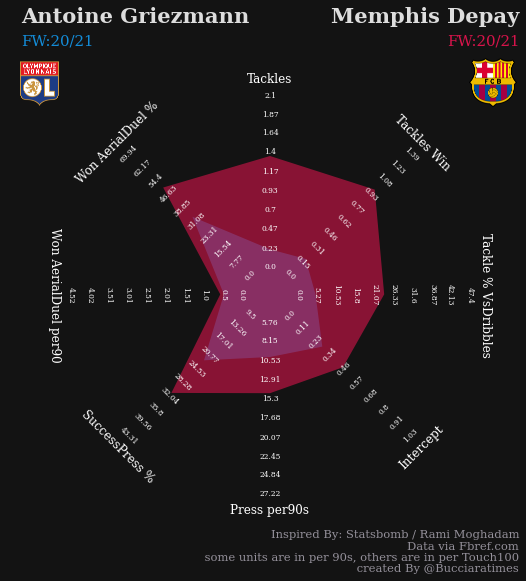

In [75]:
title = dict(
    title_name=df_player["Player"].values[0].title(),
    title_color='#dddddd',
    subtitle_name='FW:20/21',
    subtitle_color='#138CD8',
    title_name_2=df_player["Player"].values[1].title(),
    title_color_2='#dddddd',
    subtitle_name_2='FW:20/21',
    subtitle_color_2='#D8134B',
    title_fontsize=21,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n some units are in per 90s, others are in per Touch100\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#ffffff",
              range_color="#ffffff",
              label_fontsize=12,
              range_fontsize=7.5,
              fontfamily="serif")

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, title=title,
                           radar_color=['#138CD8', '#D8134B'], 
                           endnote=endnote, end_size=11.5,
#                            image='/work/assets/image/barcelona.png',
#                            image_coord=[0.495, 0.805, 0.04, 0.1],alpha=.8,
                           compare=True)

ax_logo = add_image(logo2,fig,left=0.33,bottom=.735,height=0.09)

ax_logo2 = add_image(logo,fig,left=0.65,bottom=.745,height=0.07)

# plt.savefig(f'/work/output/barcelona/griDe1.png', dpi=300, bbox_inches="tight",facecolor='#131313')